# EDA

In [1]:
DATA_PATH = "data/"

In [2]:
%pip install pyarrow pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read parquet data
X_t0 = pd.read_parquet(DATA_PATH + "X_t0.parquet")
y_t0 = pd.read_parquet(DATA_PATH + "y_t0.parquet")

df_t0 = pd.concat([X_t0, y_t0], axis=1)
df_t0.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,...,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0
4,7712572,1.557217e+09,0xbd9ed130a53cfafcf81502e4d35329a6c4d53410,1.557217e+09,1.557217e+09,264.0,2,3,-1,0.003008,...,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,0


# Exploración de datos

In [5]:
df_t0.columns

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

Primero removemos las columnas como identificadores

In [6]:
columns_to_drop = [
    'borrow_block_number',
    'wallet_address',
    'borrow_timestamp',
    'first_tx_timestamp',
    'last_tx_timestamp',
    'risky_first_tx_timestamp',
    'risky_last_tx_timestamp',
    'unique_borrow_protocol_count',
    'unique_lending_protocol_count',
]

df_t0_columns_dropped = df_t0.drop(columns=columns_to_drop, inplace=False)

df_t0_columns_dropped.shape

(44296, 69)

In [7]:
df_t0_columns_dropped.head()

,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,...,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,target
0,19973049.0,199,438,-239,0.397391,0.000981,0,0,0,0.0,...,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1
1,19973188.0,200,439,-239,0.399063,0.000983,0,0,0,0.0,...,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1
2,19973238.0,201,440,-239,0.400895,0.000985,0,0,0,0.0,...,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1
3,13922.0,8,56,-48,0.604001,0.010786,0,0,0,0.0,...,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0
4,264.0,2,3,-1,0.003008,0.001003,0,0,0,0.0,...,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0


In [8]:
sum(df_t0_columns_dropped.isna().sum() > 0)

0

In [9]:
df_t0_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   wallet_age                               44296 non-null  float64
 1   incoming_tx_count                        44296 non-null  int64  
 2   outgoing_tx_count                        44296 non-null  int64  
 3   net_incoming_tx_count                    44296 non-null  int64  
 4   total_gas_paid_eth                       44296 non-null  float64
 5   avg_gas_paid_per_tx_eth                  44296 non-null  float64
 6   risky_tx_count                           44296 non-null  int64  
 7   risky_unique_contract_count              44296 non-null  int64  
 8   risky_first_last_tx_timestamp_diff       44296 non-null  int64  
 9   risky_sum_outgoing_amount_eth            44296 non-null  float64
 10  outgoing_tx_sum_eth                      44296

In [10]:
print(df_t0_columns_dropped.describe())

         wallet_age  incoming_tx_count  outgoing_tx_count  \
count  4.429600e+04       44296.000000       44296.000000   
mean   2.943773e+07         999.369514        1360.256231   
std    2.897753e+07        3065.153260        3936.526950   
min    1.370000e+02           1.000000           0.000000   
25%    3.641601e+06          34.000000          52.000000   
50%    1.900256e+07         134.000000         207.000000   
75%    5.196818e+07         471.000000         678.000000   
max    1.540836e+08       98747.000000       71087.000000   

       net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
count           44296.000000        44296.000000             44296.000000   
mean             -360.886717            2.717345                 0.002874   
std              2167.545039           13.380028                 0.008137   
min            -68013.000000            0.000000                 0.000000   
25%              -198.000000            0.076647                 

In [11]:
numeric_features = df_t0_columns_dropped.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_t0_columns_dropped.select_dtypes(include=['object']).columns

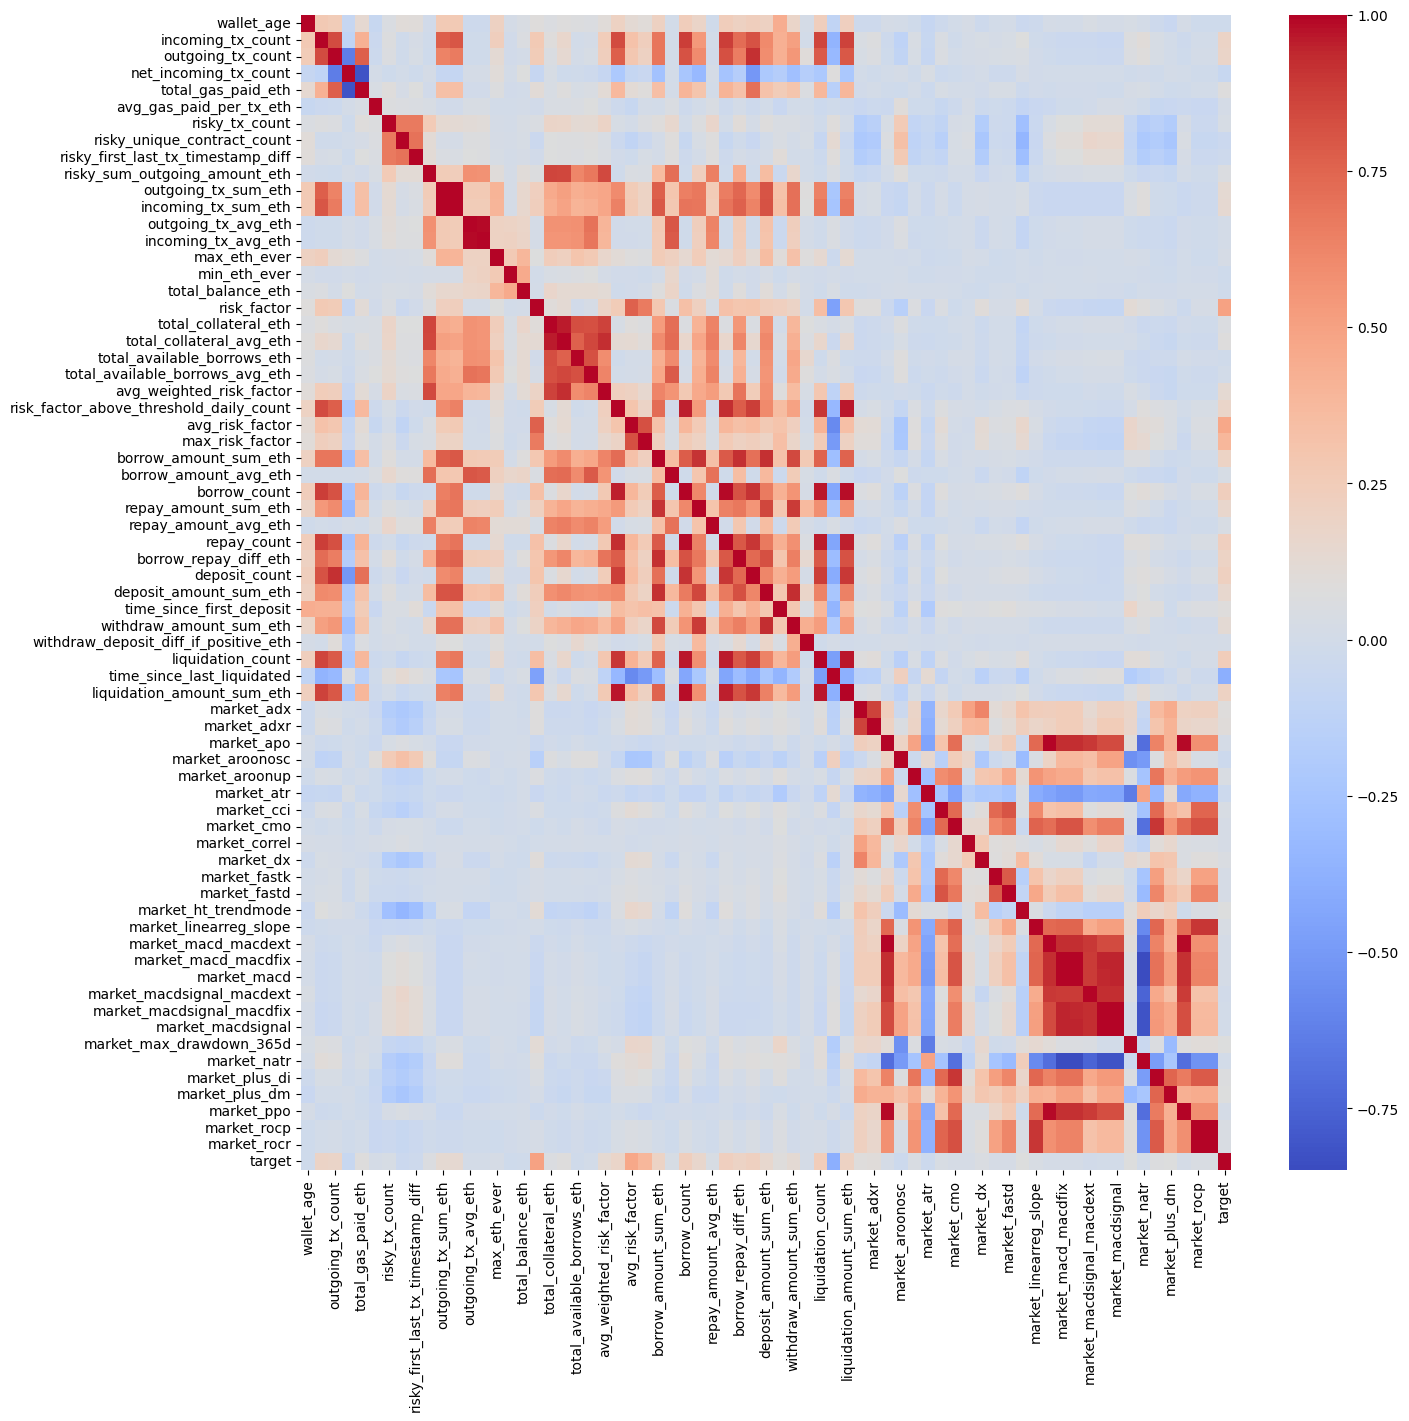

In [12]:
correlation_matrix = df_t0_columns_dropped[numeric_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [13]:
def plot_distribution_target(data, column):
    plt.figure(figsize=(6, 3))
    sns.histplot(data[column][data['target'] == 0], kde=True, bins=50, color='blue', label='target = 0')
    sns.histplot(data[column][data['target'] == 1], kde=True, bins=50, color='red', label='target = 1')
    plt.title(f"Distribución de la variable {column}")
    plt.legend()
    plt.show()
    
def plot_multiple_distributions_target(data, columns):
    for column in columns:
        plot_distribution_target(data, column)

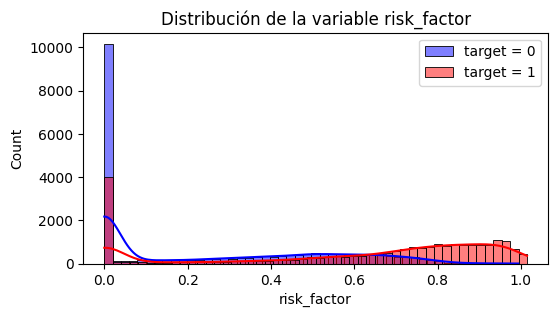

In [14]:
plot_distribution_target(df_t0_columns_dropped, 'risk_factor')

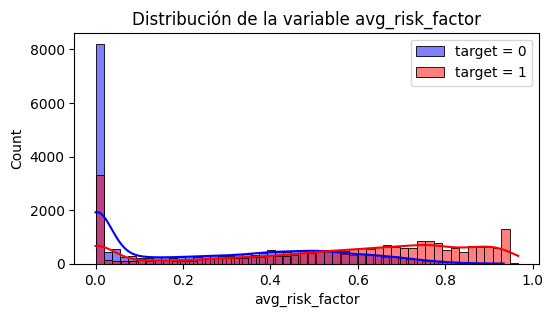

In [15]:
plot_distribution_target(df_t0_columns_dropped, 'avg_risk_factor')

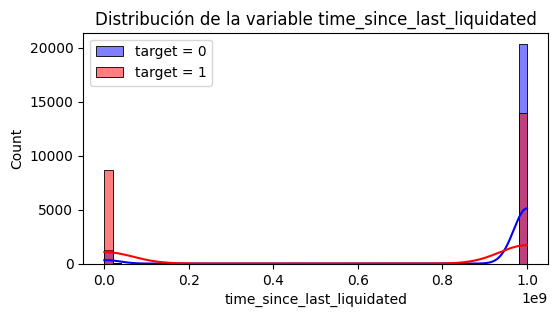

In [16]:
plot_distribution_target(df_t0_columns_dropped, 'time_since_last_liquidated')

# Entrenamos un modelo de ML

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_t0, y_t0, train_size=0.7, stratify=y_t0, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)

In [19]:
X_train = pd.DataFrame(X_train, columns=X_t0.columns)
X_val = pd.DataFrame(X_val, columns=X_t0.columns)
X_test = pd.DataFrame(X_test, columns=X_t0.columns)

y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()
y_test = np.array(y_test).ravel()

In [20]:
X_train.shape, X_val.shape, X_test.shape

((31007, 77), (6644, 77), (6645, 77))

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.drop('target')),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [22]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

def train_model(
    model: BaseEstimator,
    X_train: pd.DataFrame, 
    y_train: pd.Series,
    X_val: pd.DataFrame, 
    y_val: pd.Series,
) -> Pipeline:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    
    print(f"Model to train: {model.__class__.__name__}")
    print(f"Train accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Validation accuracy: {accuracy_score(y_val, y_val_pred)}")
    
    return pipe

Model to train: DecisionTreeClassifier
Train accuracy: 1.0
Validation accuracy: 0.8270620108368453


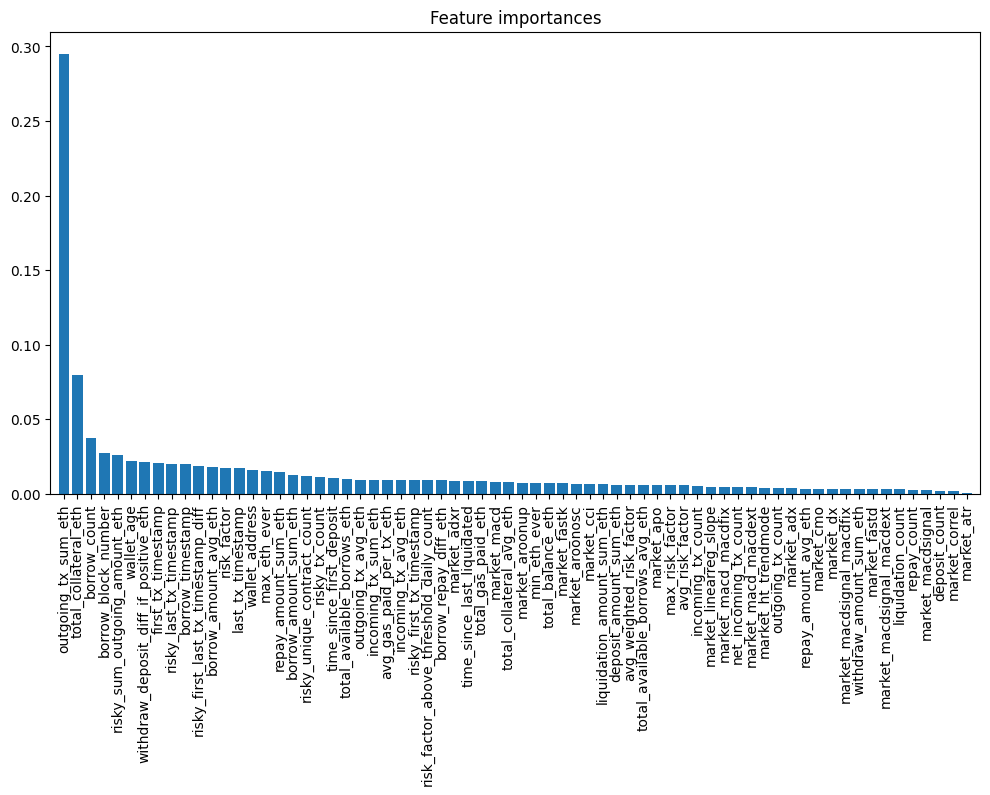

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_pipe = train_model(DecisionTreeClassifier(), X_train, y_train, X_val, y_val)
# get the tree
tree = decision_tree_pipe.named_steps['classifier']
# get the feature importances
importances = tree.feature_importances_
# get the feature names
feature_names = X_train.columns
# sort them
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
preprocessed_X_train = decision_tree_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
        align="center")

plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = [
    RandomForestClassifier(random_state=42, n_estimators=1000),
    RandomForestClassifier(random_state=42, n_estimators=1000, class_weight='balanced'),
    RandomForestClassifier(random_state=42, n_estimators=1000, class_weight='balanced_subsample'),
    #LogisticRegression(max_iter=1000),
    #SVC(),
    #MLPClassifier(max_iter=1000, random_state=42, verbose=True, learning_rate='adaptive', learning_rate_init=0.005)
]

for model in models:
    train_model(model, X_train, y_train, X_val, y_val)
    print()
    print()

KeyboardInterrupt: 

In [ ]:
%pip install mlflow

In [ ]:
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

exp1 = setup(data = df_t0, target = 'target', use_gpu=True, experiment_name='exp1')

In [ ]:
best_model = compare_models()